In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *

In [3]:
PATH = Path('data/landcover')
path_x_512 = PATH/'preprocessed'/'landcover_512'/'train'
path_y_512 = PATH/'preprocessed'/'landcover_512'/'train_class'
path_stats = PATH/'preprocessed'/'landcover_512'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 7
world_size = 1
bs = world_size * 19
num_workers = 16 * world_size

In [4]:
%run train_landcover {str(PATH)} {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size}

## Look at data

In [5]:
dl = iter(learner.data.val_dl)

In [86]:
x, y = next(dl)

In [87]:
print(x.shape, y.shape)
dx, dy = denorm(x), denorm(y, is_y=True)
print(x.shape, y.shape)

torch.Size([19, 3, 512, 512]) torch.Size([19, 512, 512])
torch.Size([19, 3, 512, 512]) torch.Size([19, 512, 512])


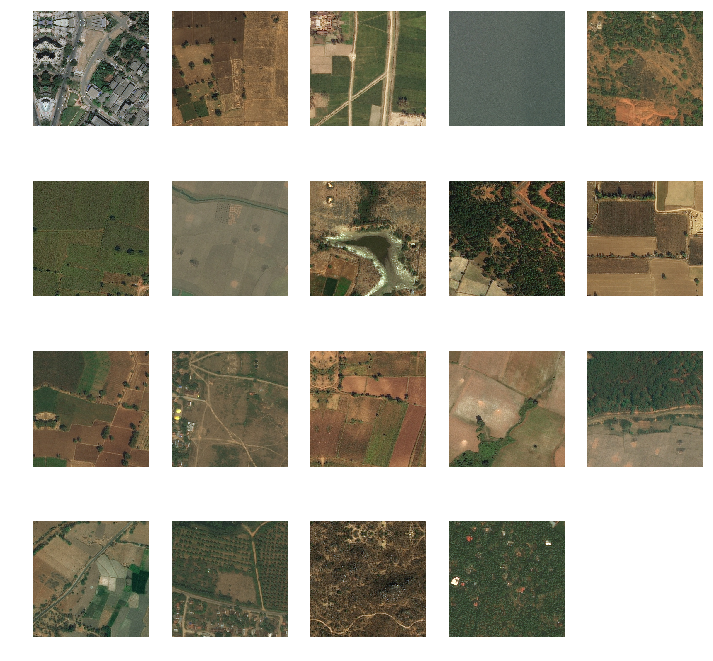

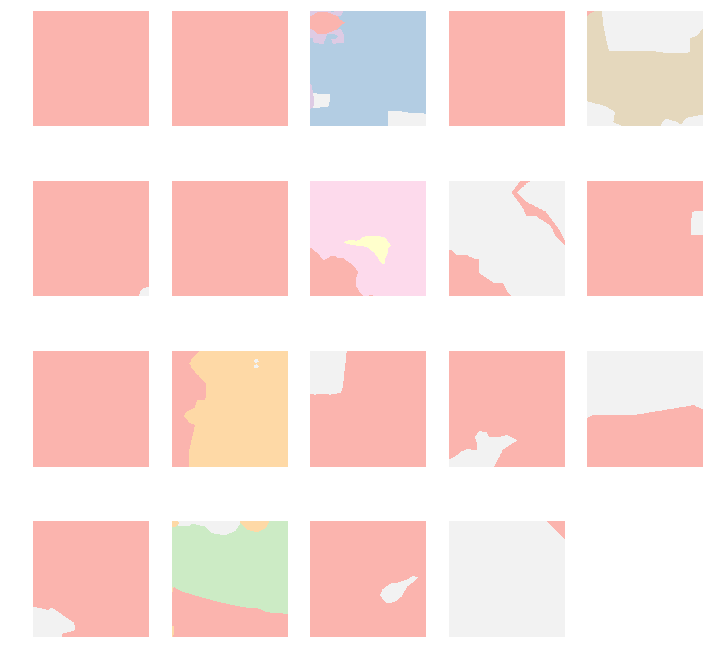

In [88]:
# idx = np.random.permutation(bs)[:8]
idx = range(bs)
data_x, data_y = dx[idx], dy[idx]
plots(data_x, rows=4)
plots(data_y, rows=4, cmap='Pastel1')

## Load model

In [20]:
device_ids = range(gpu_start, gpu_start + world_size)
learner.models.model = DataParallel(learner.models.model, device_ids)

In [61]:
fn_weights = 'data/landcover/models/first_run_best_model.h5'
load_model(learner.model, fn_weights)

In [89]:
xx = x.cpu().data.numpy()
p = learner.predict_array(xx)

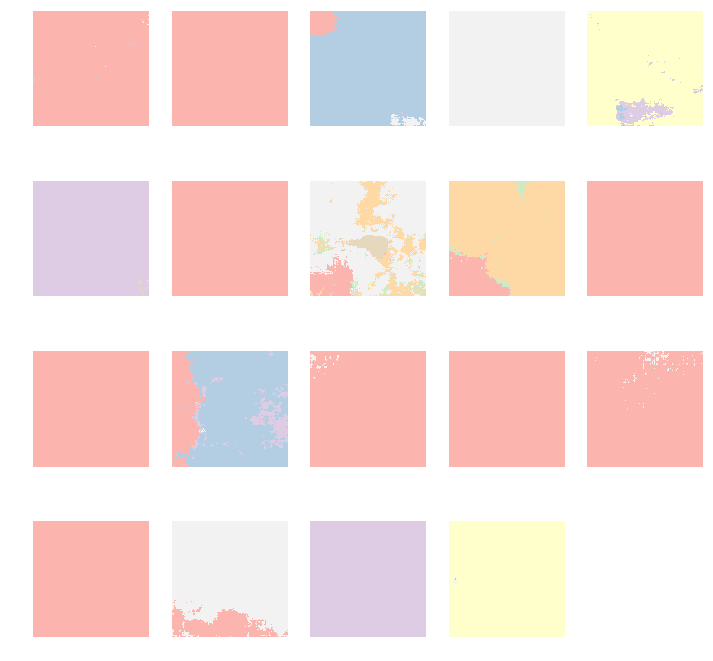

In [90]:
pp = p.argmax(axis=1)
plots(pp, cmap='Pastel1')

In [91]:
learner.crit(T(p), T(y))

tensor(0.3565, device='cuda:7')

In [76]:
print(pp[-3], dy[-3])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]] [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
